# Unicorn Comapnies' Analysis by Qiaoying Zhang

1.1. The datasets I used to produce the results are from `Kaggle - Unicorn Companies Dataset` by Deep Contractor(deepcontractor) and `Kaggle - Gender Classification Dataset` by Jifry Issadeen(elakiricoder).

1.2.1 I chose this dataset because I want to explore the statistical analysis behind the investment decisions of valuable/profitable companies. Moreover, to understand the investment opportunities in the past and how much the industries has grown within the years. Through this investment divisions, I’d also like to pose meaningful analysis on how markets were shaped and how we arrive at the current market. This dataset can help correlate the relationship of multiple variables such as total raised, investors count, deal terms, portfolio, etc. Nonetheless, I will spend time interpretating the meaning behind specific variables like *Deal Terms* and how that would affect the number of investors.  

**About Unicorn Companies Dataset**

Context: 

A unicorn company, or unicorn startup, is a private company with a valuation over `$1 billion`. As of March 2022, there are 1,000 unicorns around the world. Popular former unicorns include Airbnb, Facebook and Google. Variants include a decacorn, valued at over `$10 billion`, and a hectocorn, valued at over `$100 billion`. Download the full list today to see each company's valuation, investors, and more.

Content: 
* Data Columns(13):
    - Company
    - Valuation ($B)
    - Date of joined
    - Country
    - City
    - Industry
    - Select Investors
    - Founded year
    - Total Raised
    - Financial Stage
    - Investors Count
    - Deal Terms
    - Portfolio Exits

Link for downloading dataset: https://www.kaggle.com/datasets/deepcontractor/unicorn-companies-dataset
* Scroll down to Unicorn_Companies.csv(152.27 kB) and click download icon on the right after sign in


1.2.2 I chose this dataset because I want to explore and utilize a Python library, e.g., scikitlearn to successfully generate results. Moreover, to understand how different features contribute to identifying gender. Nonetheless, how a linear regression model can help predict a gender by features like hair length and facial features.

**About Gender Classification Dataset**

Content:

* Data Columns(8):
    - longhair: This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
    - foreheadwidthcm: This column is in CM's. This is the width of the forehead.
    - foreheadheightcm: This is the height of the forehead and it's in Cm's.
    - nosewide: This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
    - noselong: This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
    - lipsthin: This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".
    - distancenosetoliplong: This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

Link for downloading dataset: https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

Scroll down to gender_classification_v7.csv(128.32 kB) and click download icon on the right after sign in

## Read in Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Unicorn_Companies.csv')

## High Level View

In [3]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


In [4]:
df.shape

(1037, 13)

This dataset display the list of unicorn companies in the world along with their valuation and information. From looking at the head() of the dataset, we can see that the companies are ordered by their valuations. We can infer the company growth with the Date Joined(date of becoming billion valuation) and Founded Year. Longitude and latitude are not provided in the dataset; therefore, it would impossible to create a scatter_mapbox with only the Country and City. However, we will see how the unicorn companies are distributed. The Industry column with 'Other' and Financial Stage with 'None' could be large sub-categories. The Total Raised column would be the investment amount; we can use this amount to infer the overall valuation growth of a company. Investors Count is the number of investors a company has and its Selct Investors are the top few. A company portfolio provides detailed information on a business's goals, capabilities and successful projects.
**Total Raised has letters like B and M after its numeric number, conversion is needed to match the valuation($B). e.g. 1B = 1000M**

***
By definition(Investopedia):

A term sheet is a nonbinding agreement outlining the basic terms and conditions under which an investment will be made. Term sheets are most often associated with start-ups. Entrepreneurs find that this document is crucial to attracting investors, such as venture capitalists (VC) with capital to fund enterprises.
***
The Moreover, the dataset is a mix of some numerical fields like "Valuation" and some categorical fields like "Industry". Select Investors consists a list. From the shape and first column - we see that the data has 1037 rows. We can see clusters being formed for pairs of features like Investors Count and Deal Terms to further understand their relationship.

## Preliminary Exploration

### 1. Data summarization/statistical analysis

In this section, I explore the numerical values of the dataset. The aim is to get an idea of trends in the dataset using descriptive statics (top, freq etc).

1. Describe - To see dataframe level statistics of numerical fields. From looking at the top and freq row, I see take that about 24% of the dataset recently joined the unicorn club(become billion valuation). More than half the unicorn companies are in the United States, with 1/5 specialze in the Fintech industry. More companies appear to found in 2015(possibly due to Fed Rate Increase and Strong US Dollar - information from Financial Symmetry). There is a great number of `None` Financial Stage and Portfolio Exits; therefore, not good for analysis. The company `Bolt` appeared twice in the dataset, possibly due to similar naming.
2. Info - To see what is the type of data in each field. 

We see that all are object fields. Extraction and type convertion of data will be required for analysis.

Counts are the same for all fields. Therefore, There are **no** null values.

In [5]:
df.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
count,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037
unique,1035,200,623,46,256,33,1006,37,914,10,54,16,5
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,None,2015,None,None,10,1,None
freq,2,244,9,536,145,205,17,144,24,988,69,280,988


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1037 non-null   object
 1   Valuation ($B)     1037 non-null   object
 2   Date Joined        1037 non-null   object
 3   Country            1037 non-null   object
 4   City               1037 non-null   object
 5   Industry           1037 non-null   object
 6   Select Inverstors  1037 non-null   object
 7   Founded Year       1037 non-null   object
 8   Total Raised       1037 non-null   object
 9   Financial Stage    1037 non-null   object
 10  Investors Count    1037 non-null   object
 11  Deal Terms         1037 non-null   object
 12  Portfolio Exits    1037 non-null   object
dtypes: object(13)
memory usage: 105.4+ KB


#### Preprocessing

In [7]:
# To reformat the valuation and Total Raised column without $ sign
df['Valuation ($B)'] = df['Valuation ($B)'].str.replace('$', '', regex = True).astype(float) # change to float type 
df['Total Raised'] = df['Total Raised'].str.replace('$', '', regex = True)
# replace Total Raised after converting B/M, 'None' will be 0
df['Total Raised'] = df['Total Raised'].apply(lambda x: float(x.replace('B', '')) if 'B' in str(x) else ((float(x.replace('M', '')) / 1000) if 'M' in str(x) else 0))

df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7.440,IPO,28,8,5
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6.874,None,29,12,None
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2.901,Asset,39,12,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3.472,Acquired,56,13,1
4,Epic Games,42.0,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4.377,Acquired,25,5,2


### 2. Data visualization
In this section, the distribution of companies valuation is displayed in a histogram form with bins of 75.
    
    There exists a right-skewed distribution with a mode at 1. 
    Only few decacorns(valuation > 10B) and hectocorns(valuation > 100B) near zero, which are outliers. 
    The span of the graph (bins) is about 2.
    Therefore, most companies just hit 1 billion valuation with few exceptions like Bytedance and SpaceX that can hit 100 billions.

In [8]:
# Imports
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

Text(0.5, 1.0, 'Distribution of Valuation')

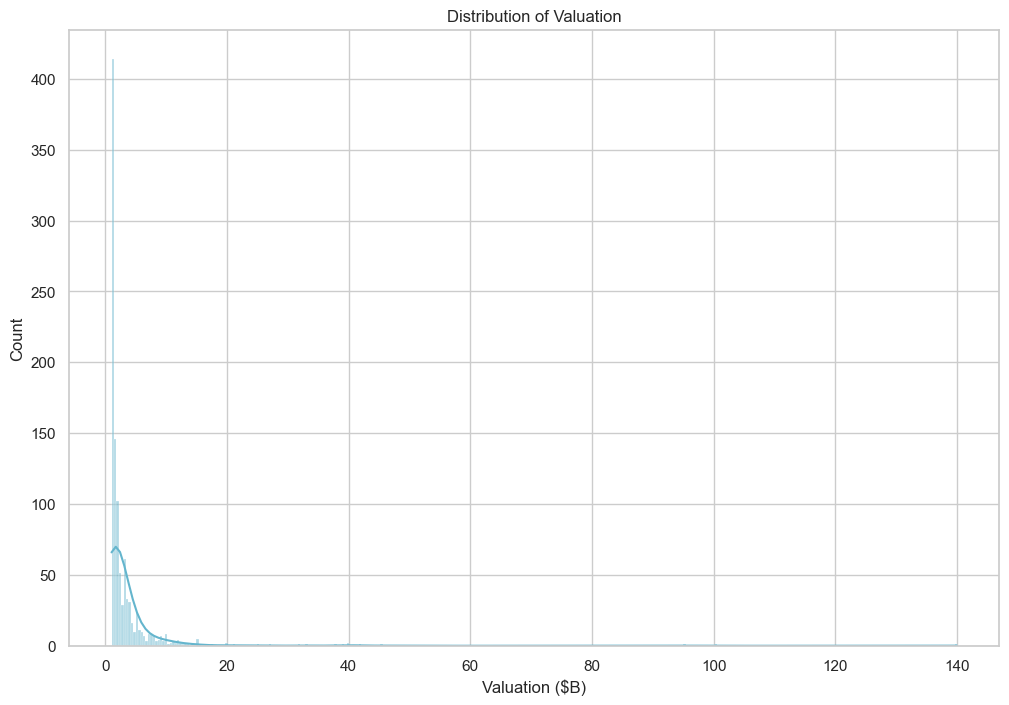

In [9]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.histplot(df['Valuation ($B)'], kde = True, color = 'c')

plt.title('Distribution of Valuation')

### 3. Defining objectives

**I want to analyze how features of a company such as years, location, domain, investors, valuation and more affect each other. This will help me better estimate an outcome and understand if multiple fields can together affect the overall valuation of a company. Nonethless, to practice Machine Learning with a simple dataset that is closely aligned to the real world scenario and gives better results.**

The objectives for the data analysis tasks are:
- Unicorn Companies Dataset
1. How closely are Valuation, number of years to become a unicorn company(Date Joined - Founded Year), Total Raised, Investors Count, and Deal Terms related?
    - Define correlations of every reliable numeric variable in the dataset, specifically the effect of Deal Terms on Total Raised.
    - How are Unicorn Time(Date Joined - Founded Year), Total Raised, Investors Count, Deal Terms and Portfolio Exits related to each other? Does one correlation project the other?
    - Understanding how Total Raised is distributed in the pair features, specifically Portfolio Exits.
2. What are some of the industries that have higher/lower valuation? Can they be aggregated or categorized by country?
- Gender Classification Dataset 
3. How can facial features be used to predict gender? What are the coefficient?

### 4. Present My Findings

#### a.1. Analyze how features like Valuation, number of years to become a unicorn company(Date Joined - Founded Year), Total Raised, Investors Count, and Deal Terms affect each other.
We have several personal related fields available in the dataset. To analyze the effect of one variable on the other, we would need to find the correlation between them. This will be an analysis based on all companies provided in the dataset.

But first, calculation for the number of years to become a unicorn company is needed.

1. Choice of visualization - A correlation heatmap would be an ideal plot for this objective. It provides a color gradient based on strength of correlation and is easy to read.

In [10]:
# Since some companies does not display their founded year, Investors Count, and Deal Terms, these companies will need to be set to 0
len(df[df['Founded Year'] == 'None']), len(df[df['Investors Count'] == 'None']), len(df[df['Deal Terms'] == 'None'])

(43, 1, 29)

In [11]:
# replace any 'None' to 0
df['Investors Count'].replace('None', 0, inplace=True)
df['Deal Terms'].replace('None', 0, inplace=True)
df['Portfolio Exits'].replace('None', 0, inplace=True)
# change object type to int
df['Investors Count'] = df['Investors Count'].astype('int')
df['Deal Terms'] = df['Deal Terms'].astype('int')
df['Portfolio Exits'] = df['Portfolio Exits'].astype('int')
# change time type
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

# filter the dataframe to eliminate companies with unknown founded year and calculate the time to become unicorn company(store as Unicorn Time)
df_filtered = df.loc[df['Founded Year'] != 'None', ['Valuation ($B)', 'Date Joined', 'Founded Year', 'Total Raised', 'Investors Count', 'Deal Terms', 'Portfolio Exits']]
df_filtered['Unicorn Time'] = df_filtered['Date Joined'].dt.year - df_filtered['Founded Year'].astype(int)

# after calculating the time to become Unicorn, the Data Joined and Founded Year column is no longer needed
del df_filtered['Date Joined'], df_filtered['Founded Year']

df_filtered.head()

,Valuation ($B),Total Raised,Investors Count,Deal Terms,Portfolio Exits,Unicorn Time
0,140.0,7.440,28,8,5,5
1,100.3,6.874,29,12,0,10
2,95.0,2.901,39,12,1,4
3,45.6,3.472,56,13,1,6
4,42.0,4.377,25,5,2,27


2. Plot the graph


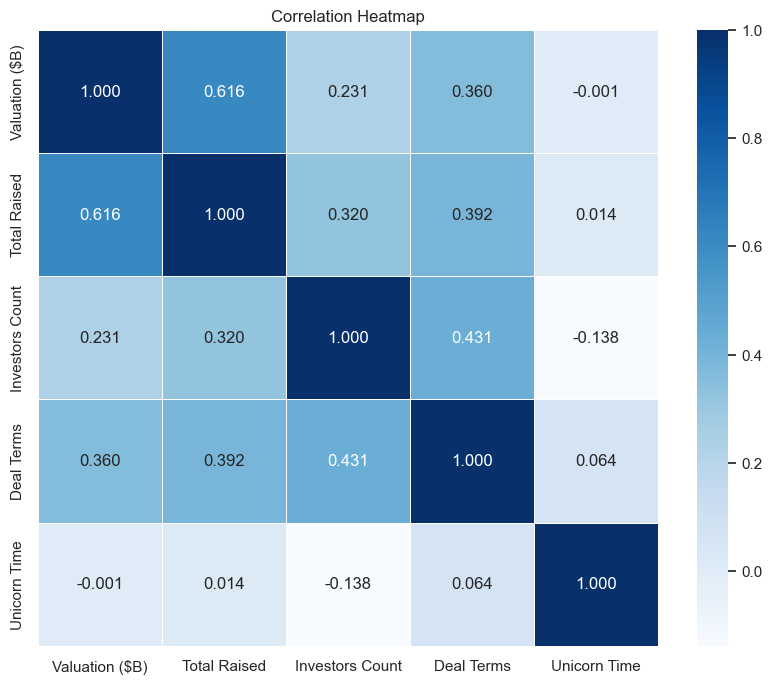

In [12]:
plt.figure(figsize = (10, 8))
plt.title('Correlation Heatmap')
sns.heatmap(df_filtered[['Valuation ($B)', 'Total Raised', 'Investors Count', 'Deal Terms', 'Unicorn Time']].corr(), annot = True, cmap='Blues', fmt = ".3f",  linewidths = 0.5)
plt.show()

3. Inference : The higher the value of correlation, the greater one field affects the other. Most correlation values from the heatmap are positive except the Unicorn Time, meaning that variables are mostly directly proportional. From the heatmap, Total Raised is strongly positively correlated to Valuation(0.615); Investors Count has little to do with Valuation and Total Raised(both < 0.5). Thus, generally speaking greater amount of raise would lead to increase in company valuation, where the number of investors merely affect the valuation. Another high correlation(near 0.5) we encounter is the Investor Count and the Deal Terms; Thus, the definition for Term Sheet holds. Furthermore, Deal Terms has a weak positive correlation with both Valuation and Total raise(near 0.4), which can be utilize when attempting to invite more investment raises. Similarly, Unicorn Time is imperceptibly correlated to many other variables(< 0.1). Therefore, Unicorn Time makes little to none correlation to many investment factors in effect to Valuation. If Investors Count increase, Unicorn Time may decrese(slight negative correlation).

#### a.2. Analyze how features like Unicorn Time(Date Joined - Founded Year), Investors Count, Deal Terms, and Portfolio Exits correlated, and how they affect Total Raised($B).
We have several personal related fields available in the dataset. To analyze the effect of one variable on the other, we would need to find the correlation between them. This will be an analysis based on all countries provided in the dataset.

1. Choice of visualization - A paire plot of Unicorn Time, Investors Count, Deal Terms, and Portfolio Exits based on hue of Total Raised would be an ideal plot for this objective. It displays (linear) relationship between the four variales, and showcase the correlation of Total Raised to these variables.

2. Plot the graph


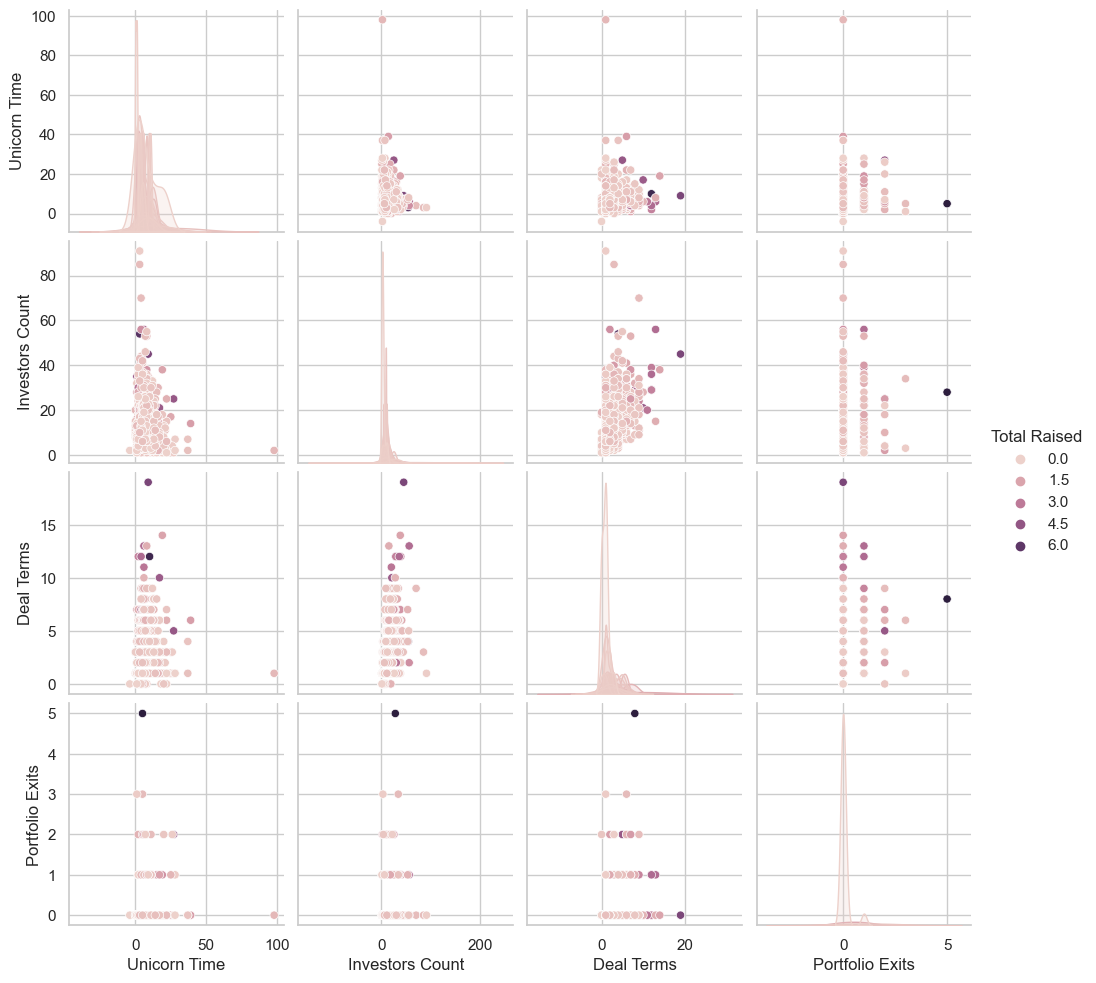

In [13]:
sns.pairplot(df_filtered, vars = ['Unicorn Time', 'Investors Count', 'Deal Terms', 'Portfolio Exits'], hue = 'Total Raised')

3. Inference : The higher the Portfolio Exits(5) and Deal Terms(10+), the higher the Total Raised regardless of the feature being projected on. Something to consider: if you want to raise a large amount of fund, find the most trustworthy and exceptional companies(start-ups can be unpredictable). In other words, as long as the Deal Terms are reasonable, investors are likely to raise more fund. For example, most companies have no Portfolio Exits but have a greater Total Raised distribution when it comes to Deal Terms that are greater than 10. On the other hand, most unicorn companies have similar amount of Investors Count and Unicorn Time(Date Joined - Founded Year) with Total Raise around 0.0 to 1.5 billion dollars. Probably only 1/7 companies get Total Raise higher than 3.0.

##### Interesting finding

Companies with the *minimum and maximum* Unicorn Time has only `2` Investors Count.

The company `Otto Bock HealthCare` from the health industry in Duderstadt, Germany took almost a century(98 yrs) to become a unicorn company(valuation >= 1 billion). 

Strangely, the company `Yidian Zixun` from the mobile & telecommunications industry in Beijing, China founded last year but became a unicorn company in 2017. Time traveler?

In [14]:
df_filtered[(df_filtered['Unicorn Time'] == df_filtered['Unicorn Time'].min()) | (df_filtered['Unicorn Time'] == df_filtered['Unicorn Time'].max())]

,Valuation ($B),Total Raised,Investors Count,Deal Terms,Portfolio Exits,Unicorn Time
215,3.52,0.81549,2,1,0,98
599,1.40,0.01500,2,0,0,-4


In [15]:
df.iloc[215]

Company              Otto Bock HealthCare
Valuation ($B)                       3.52
Date Joined           2017-06-24 00:00:00
Country                           Germany
City                           Duderstadt
Industry                           Health
Select Inverstors            EQT Partners
Founded Year                         1919
Total Raised                      0.81549
Financial Stage                      None
Investors Count                         2
Deal Terms                              1
Portfolio Exits                         0
Name: 215, dtype: object

In [16]:
df.iloc[599]

Company                                                Yidian Zixun
Valuation ($B)                                                  1.4
Date Joined                                     2017-10-17 00:00:00
Country                                                       China
City                                                        Beijing
Industry                                Mobile & telecommunications
Select Inverstors    Phoenix New Media, Tianjin Haihe Industry Fund
Founded Year                                                   2021
Total Raised                                                  0.015
Financial Stage                                                None
Investors Count                                                   2
Deal Terms                                                        0
Portfolio Exits                                                   0
Name: 599, dtype: object

#### b. Understand distribution of location and industry

We have several region related fields available in the dataset. To analyze the effect of one variable on the other, we would need to find the correlation between them. This will be an analysis based on all countries provided in the dataset.

Choice of visualization - 2 subplots (histogram and box plot) is displayed to understand valuation trends by industry. It provides an overview of the industry distribution and how spread out they are. The box plot also depict the valuation quantiles of every industry, aggregated by countries.

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(100, 100))

# Plot the industry counts with histogram
industry_count = df.Industry.value_counts()
industry_count.plot(ax = axes[0], kind = 'bar', facecolor = 'lavender', title = 'Counts of Listings by Industry')

# Plot the valuation vs industry aggregated by country with horizontal boxes
sns.boxplot(ax = axes[1], y = 'Valuation ($B)', x = 'Industry', hue= 'Country', data = df, width = .7, palette = 'Spectral', showfliers = False)

# set title and axis labels for box plot
axes[1].set_title('Listings of Industry by Happiness Score')
axes[1].set(ylabel = '')

# Tweak the visual presentation
plt.subplots_adjust(wspace = 0.3)
sns.despine(left = True)

Inference : From looking at the distribution, The unicorn companies are mostly from the United States and part from China(most in warm hue). The two modes of the Industry distribution are Finetech and Internet software & Services(~210 and ~180). Most industries participate in the Fintech industry while other industry has most distribution from Asia. The Fintech industry has an overall similar distribution across multiple country except for Spain and France. The Internet software & services has medium popularity but its valuation are most spread out with a interquartile range of > 10.

#### c. Perform regression analysis to predict gender.

1. Choice of ML model - I used a linear regression analysis to predict the value of a variable based on the value of another variable(use facial features to predict gender with Machine Learning).

##### Data summarization/statistical analysis

In this section, I explore the numerical values of the dataset. The aim is to get an idea of trends in the dataset using descriptive statics (five number summary).

1. Describe - To see dataframe level statistics of numerical fields. There is a balance distribution of both female and male(mean ~0.5). Most of the subject are long hair and have similar forehead shape(both width and height have small std). With similar mean in the nose_wide, nose_long, lips_thin, and distance_nose_to_lip_long, I assume female and male both have similar features within their group so this dataset will be a clear representation for the purpose of machine learning.
2. Info - To see what is the type of data in each field. 

We see that most are numberic fields with only the gender object. Will need to be relabeled as numeric for machine learning.

Counts are the same for all fields. Therefore, There are **no** null values.

In [18]:
# Accessing dataset
df = pd.read_csv('gender_classification_v7.csv')

In [19]:
# data visualization
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [20]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


##### Data visualization
In this section, we visualize and compare how forehead width differentiate between hair length for male vs female.
    
    There exists an equal distribution of data(similar number of gender data).
    Both male and female have forehead width between 12.5 to 13.5 cm.
    Male appear to have slightly wider forehead.
    long_hair does not seen to be a bias variable.

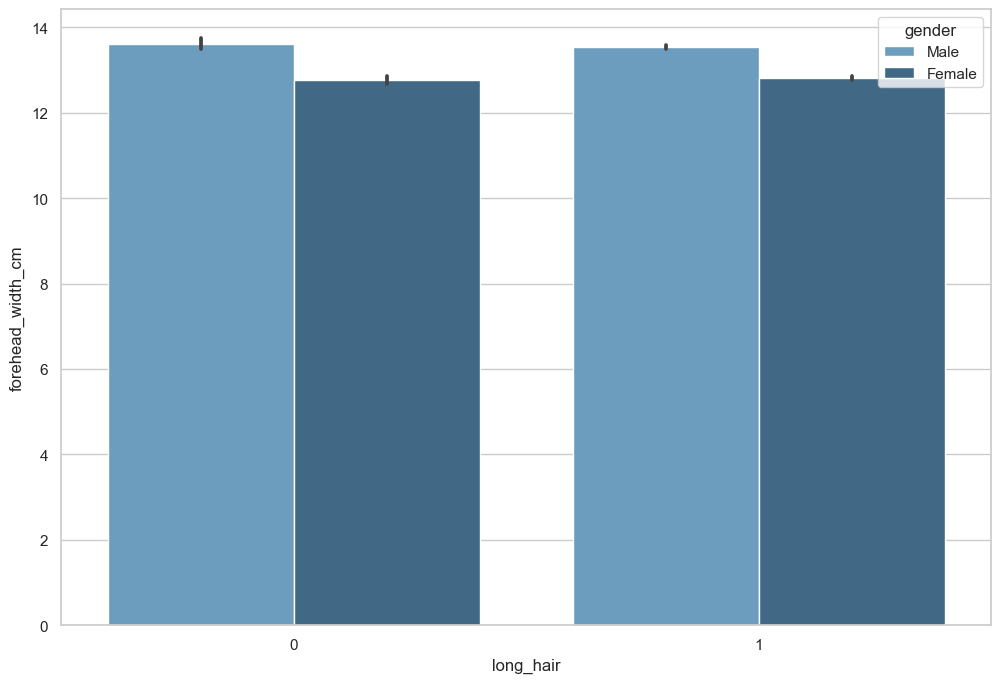

In [22]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='long_hair', y='forehead_width_cm', hue='gender', data=df, palette='Blues_d')

##### Preprocessing

In [23]:
# machine learning libraries
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [24]:
# transform the categorical variables into numberic datatypes
label = LabelEncoder()

label.fit(df.gender.drop_duplicates())
df.gender = label.transform(df.gender)

df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                         int32
dtype: object

In [25]:
df_filltered = df.copy()

In [26]:
X = df_filltered.drop(['gender'], axis = 1)
y = df_filltered['gender']

In [27]:
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [28]:
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int32

In [29]:
# Split the data into train and test for model training and testing. Keep 20% for testing and rest for training.
X_train, X_test, y_train, y_test = holdout(X, y, test_size = 0.2, random_state = 0)

In [30]:
# Using libraries imported above, create a Linear Regression model (Fit on training data)
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)

LinearRegression()

##### Coefficient & Intercept Calculation

In [31]:
print('Coefficients ->', Lin_reg.coef_)

Coefficients -> [-0.01420841  0.02237739  0.04686397  0.29329855  0.25769685  0.25505723
  0.27670373]


* Separate coefficients for each feature (stored in coef_) and one intercept (stored in intercept_).
* Positive coefficients - gender increase as feature value increases.
* Negative coefficients - gender decrease as feature value decreases.
* close to zero - these apparantly have little to no affect on gender.

In [32]:
# As nose_wide increases one unit, such as from 0 to 1, 
# the gender increase by a factor of 0.293 assuming everything else is constant.
for i, name in enumerate(X.columns):
    print(f'{name:>10}: {Lin_reg.coef_[i]}')

 long_hair: -0.014208414901611718
forehead_width_cm: 0.0223773949147206
forehead_height_cm: 0.04686397196033655
 nose_wide: 0.2932985503063336
 nose_long: 0.2576968519537568
 lips_thin: 0.2550572271601758
distance_nose_to_lip_long: 0.2767037305357956


##### Evaluation: Calculate Mean Squared Error and Coefficient of determination

In [33]:
# On testing data
y_pred_test = Lin_reg.predict(X_test)
y_pred_train = Lin_reg.predict(X_train)

mean_squared_error(y_pred_test, y_test)

0.042920100248295956

In [34]:
r2_score(y_pred_test, y_test)

0.7945549725383481

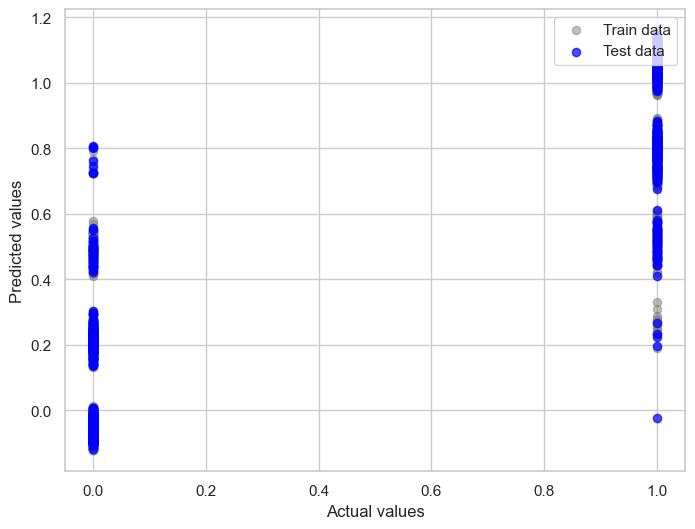

In [35]:
# plot
plt.figure(figsize=(8,6))

plt.scatter(y_train, y_pred_train,
            c = 'gray', marker = 'o', s = 35, alpha = 0.5,
            label = 'Train data')

plt.scatter(y_test, y_pred_test,
            c = 'blue', marker = 'o', s = 35, alpha = 0.7,
            label = 'Test data')

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc = 'upper right')

The actual vs predicted plot is polarized in our model suggesting that there is little room for improvement in the model.

In [36]:
# Assume a long hair(1) with forehead_width_cm(12), forehead_height_cm(5.5), small nose(0), short nose(0), thick lips(0), distance_nose_to_lip is short(0).
# we can enter this data into a numpy array as follows: long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long

new_person_data = np.array([1, 13, 6, 0, 0, 0, 0]).reshape(1,-1)

In [37]:
# prediction
prediction = Lin_reg.predict(new_person_data)
np.exp(prediction)[0]

C:\Users\qiaoy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.9573815909824519

So the predicted gender would be female(< 1).

3. Inference : The root mean squared erro, RMSE, captures the vairation of the predicted value from the observed value. So an RMSE of 0.043 is a near perfect prediction(possible error). Its prediction have more difference from the observed values. The R2 score is the value used to evaluate the performance of the model. Here, a positive value near 1 indicates that the estimator perfectly predicts the depend variable's value, given the independent variables' value. Features like shape of nose, lips, and whether or not their nose is far from the lips will have greater effect on defining gender; whereas, forehead shape and hair length have little to do with gender. A female is more likely to be a thicklip with small nose that is close to her lips compared to a male.